In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
!pip install kagglehub

In [3]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Path to dataset files: C:\Users\Coco\.cache\kagglehub\datasets\tunguz\online-retail\versions\1


(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [7]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

C:\Users\Coco\AppData\Local\Temp\ipykernel_78860\3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [8]:
df.isnull().sum()

InvoiceNo            0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135080
Country              0
TotalPrice           0
DayOfWeek            0
InvoiceMonth         0
dtype: int64

In [9]:
df['cancel'] = df['InvoiceNo'].str.startswith('C', na=False).astype(int)
print(df['cancel'].value_counts())

cancel
0    532621
1      9288
Name: count, dtype: int64


InvoiceNo에서 C로 시작하는 주문은 취소 주문이고 9288개가 존재

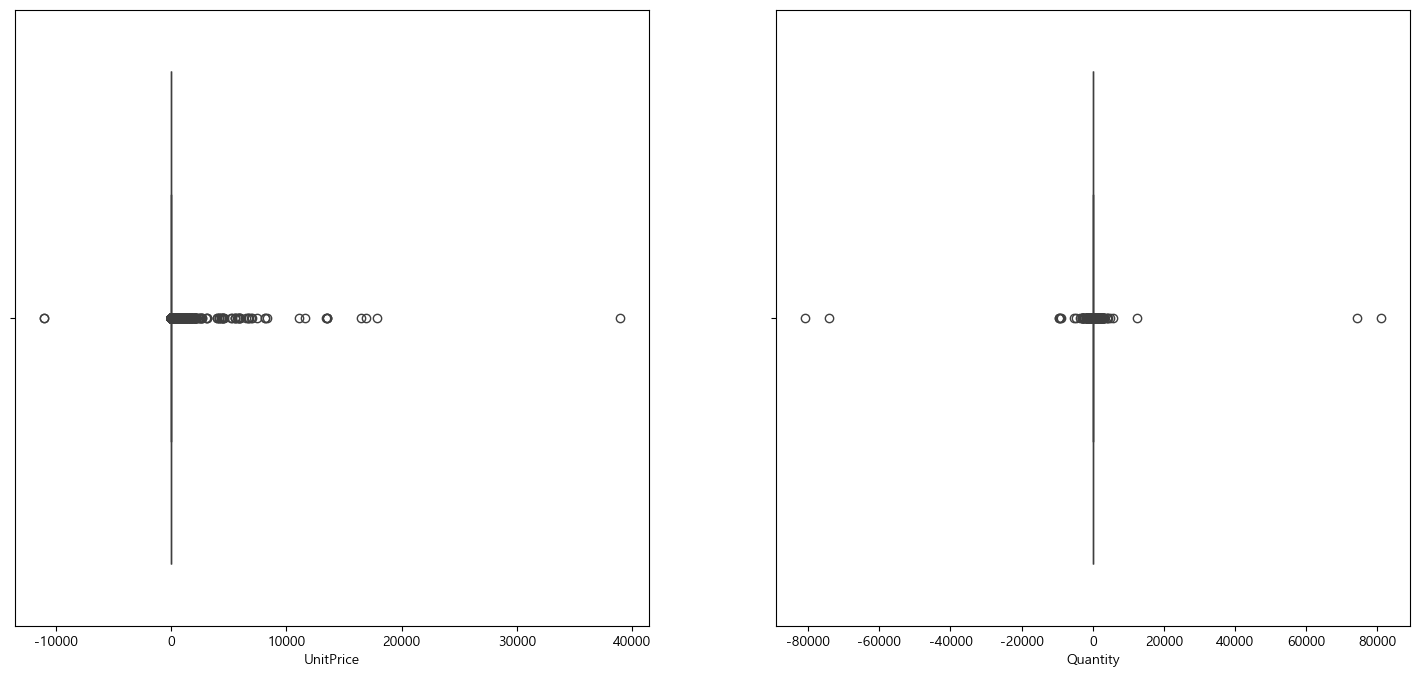

In [10]:
f, ax = plt.subplots(1,2,figsize=(18,8)) #수량과 가격 분포 확인

sns.boxplot(x = 'UnitPrice', data=df, ax=ax[0])
sns.boxplot(x = 'Quantity', data=df, ax=ax[1]) 
plt.show()

In [11]:
df[df['Quantity'] < 0] #수량이 0 미만인 주문 확인, 대부분 취소된 주문 , C536379 값을 기억해주세요!

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,cancel
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,2,12,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,2,12,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2,12,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2,12,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,4,12,1
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,4,12,1
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,4,12,1
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,4,12,1


In [12]:
df[(df['cancel'] == 0) & (df['Quantity'] < 0)] #최소되지 않은  주문 중에서 수량이 음수인 경우도 존재 ==> 이상치

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,cancel
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,-0.0,2,12,0
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom,-0.0,3,12,0
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,-0.0,4,12,0
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,-0.0,4,12,0
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom,-0.0,4,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom,-0.0,2,12,0
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom,-0.0,2,12,0
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom,-0.0,2,12,0
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom,-0.0,3,12,0


In [13]:
df = df[(df['cancel'] == 1) | (df['Quantity'] >= 0)] # 취소되지 않은 주문 중 수량이 음수인 이상치 제거
df = df[df['UnitPrice'] > 0] #가격이 음수나 0인 이상치 제거


In [14]:
df[df['InvoiceNo'] == 536379] #취소된 주문에서 C를 제거한 Invoice는 취소 전 주문을 의미하는 것이 아님 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,cancel


취소된 주문에서 C를 제거한 Invoice는 취소 전 주문을 의미하는 것이 아님 
취소된 주문과 취소전 주문 쌍을 제거해야 이후의 통계 분석 결과가 정확해질 것으로 판단함
주문-취소 쌍을 파악하기 위해 CustomerID,Quantity,UnitPrice,StockCode로 비교 분석함

In [15]:
cancellation = df[df['cancel'] == 1].copy()
order = df[df['cancel'] == 0].copy()

cancellation['PosQuantity'] = cancellation['Quantity'].abs()

for col in ['CustomerID']: #결측치를 N/A 로 대체 => 결측치 끼리도 주문-취소 쌍 대조를 위해서
    cancellation[col] = cancellation[col].fillna('N/A')
    order[col] = order[col].fillna('N/A')

#매칭키 생성
order['match_key'] =  order['CustomerID'].astype(str) + '|' + \
                      order['StockCode'].astype(str) + '|' + \
                      order['Quantity'].astype(int).astype(str) + '|' + \
                      order['UnitPrice'].astype(float).astype(str)

cancellation['match_key'] = cancellation['CustomerID'].astype(str) + '|' + \
                            cancellation['StockCode'].astype(str) + '|' + \
                            cancellation['PosQuantity'].astype(int).astype(str) + '|' + \
                            cancellation['UnitPrice'].astype(float).astype(str)

order_key_set = set(order['match_key'])
#취소-주문 쌍 식별
matched_mask = cancellation['match_key'].isin(order_key_set)

#제거할 행의 인덱스(위치) 식별
cancellation_indices_drop = cancellation[matched_mask].index

matched_key_set = set(cancellation[matched_mask]['match_key'])

potential_order_drop = order[order['match_key'].isin(matched_key_set)]

order_drop = potential_order_drop.drop_duplicates(subset=['match_key'], keep='first')

order_indices_drop = order_drop.index

all_indices_drop = cancellation_indices_drop.union(order_indices_drop)
df= df.drop(index=all_indices_drop)


In [16]:
df[df['cancel'] == 1] #원래 주문을 찾지 못한 취소 건들

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,cancel
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,2,12,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,2,12,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2,12,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2,12,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,4,12,1
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,4,12,1
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,4,12,1
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,4,12,1


In [17]:
df = df[df['cancel'] == 0] # 나머지 취소 건들 제외

## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [18]:
rd_sample = df.sample(n=1000, random_state=1)

pp_mean = df['TotalPrice'].mean()
pp_std = df['TotalPrice'].std()

sample_mean = rd_sample['TotalPrice'].mean()
sample_std = rd_sample['TotalPrice'].std()

print(f'모집단 평균:{pp_mean:.2f}, 모집단 표준편차:{pp_std:.2f}')
print(f'표본집단 평균:{sample_mean:.2f}, 표본집단 표준편차:{sample_std:.2f}')

모집단 평균:19.38, 모집단 표준편차:86.52
표본집단 평균:19.99, 표본집단 표준편차:67.65


1000개 표본은 전체 표본 수의 0.18% 밖에 되지 않기 때문에 평균과 표준편차가 차이가 크다
그리고 표본 중에 이상치가 있기 때문에 모집단의 편차가 크고, 표본 집단에는 이상치가 적게 포함되어서 편차가 작은 것 같다

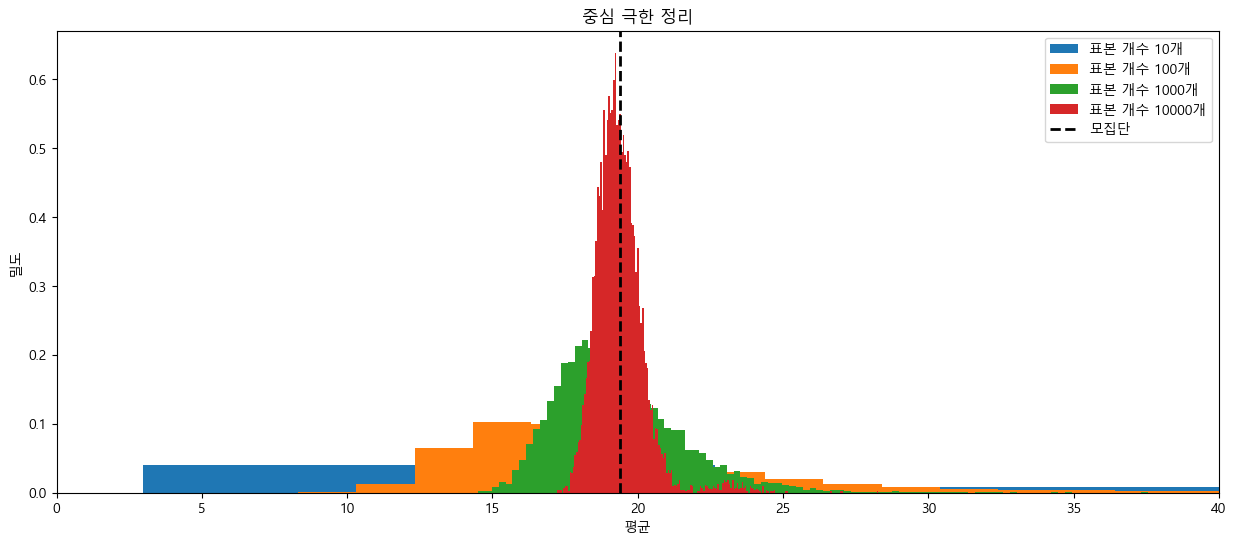

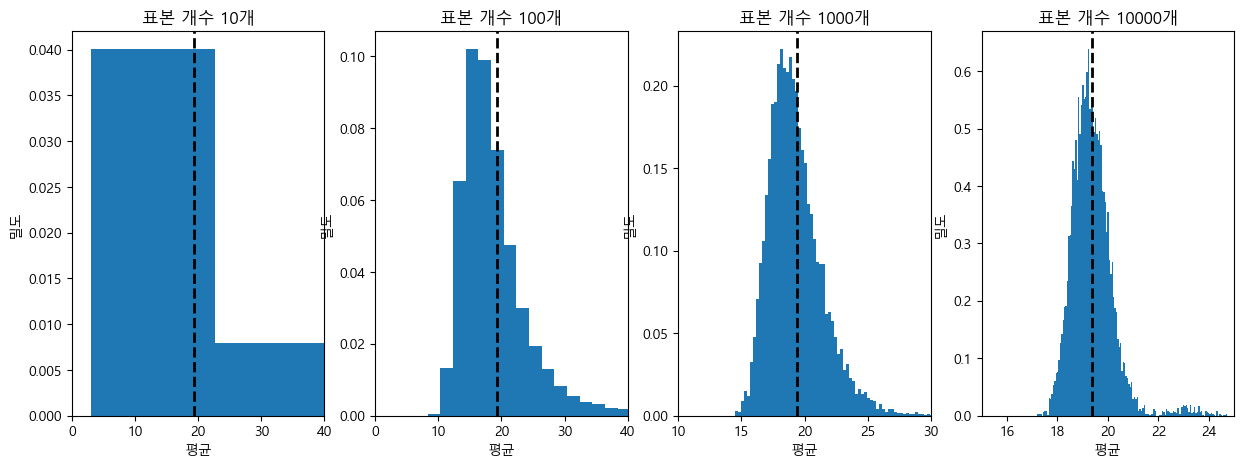

x축 범위가 달라짐에 주의!


In [19]:

trial = 10000 #시행 횟수     

sample_means1 = []
sample_means2 = []
sample_means3 = []
sample_means4 = []

for i in range(trial):
    sample1 = df['TotalPrice'].sample(n=10, replace=True)
    sample2 = df['TotalPrice'].sample(n=100, replace=True)
    sample3 = df['TotalPrice'].sample(n=1000, replace=True)
    sample4 = df['TotalPrice'].sample(n=10000, replace=True)
    
    sample_means1.append(sample1.mean())
    sample_means2.append(sample2.mean())
    sample_means3.append(sample3.mean())
    sample_means4.append(sample4.mean())


plt.figure(figsize=(15, 6))
plt.hist(sample_means1, bins=200, density=True, label='표본 개수 10개')
plt.hist(sample_means2, bins=200, density=True, label='표본 개수 100개')
plt.hist(sample_means3, bins=200, density=True, label='표본 개수 1000개')
plt.hist(sample_means4, bins=200, density=True, label='표본 개수 10000개')

plt.axvline(pp_mean, color='black', linestyle='--', linewidth=2, label='모집단')

plt.title('중심 극한 정리')
plt.xlabel('평균')
plt.ylabel('밀도')
plt.legend()
plt.xlim([0, 40])
plt.show()


plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.hist(sample_means1, bins=200, density=True, label='표본 개수 10개')
plt.axvline(pp_mean, color='black', linestyle='--', linewidth=2, label='모집단')
plt.title('표본 개수 10개')
plt.xlabel('평균')
plt.ylabel('밀도')
plt.xlim([0, 40])

plt.subplot(1, 4, 2)
plt.hist(sample_means2, bins=200, density=True, label='표본 개수 100개')
plt.axvline(pp_mean, color='black', linestyle='--', linewidth=2, label='모집단')
plt.title('표본 개수 100개')
plt.xlabel('평균')
plt.ylabel('밀도')
plt.xlim([0, 40])

plt.subplot(1, 4, 3)
plt.hist(sample_means3, bins=200, density=True, label='표본 개수 1000개')
plt.axvline(pp_mean, color='black', linestyle='--', linewidth=2, label='모집단')
plt.title('표본 개수 1000개')
plt.xlabel('평균')
plt.ylabel('밀도')
plt.xlim([10, 30])

plt.subplot(1, 4, 4)
plt.hist(sample_means4, bins=200, density=True, label='표본 개수 10000개')
plt.axvline(pp_mean, color='black', linestyle='--', linewidth=2, label='모집단')
plt.title('표본 개수 10000개')
plt.xlabel('평균')
plt.ylabel('밀도')
plt.xlim([15, 25])
plt.show()

print("x축 범위가 달라짐에 주의!")

샘플 갯수가 많아 질수록 분산이 줄어들고 평균에 가까워짐 => 중심극한 정리를 따름

중심 극한 정리에 의해 표본 개수가 많아 질수록 표본 집단의 평균의 평균이 모집단의 평균과 비슷해지고 유추할 수 있습니다.


## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [20]:
df['Country'].value_counts()

Country
United Kingdom          482609
Germany                   8956
France                    8333
EIRE                      7717
Spain                     2459
Netherlands               2355
Belgium                   2024
Switzerland               1958
Portugal                  1491
Australia                 1114
Norway                    1060
Channel Islands            747
Italy                      746
Finland                    683
Cyprus                     611
Unspecified                446
Sweden                     445
Austria                    398
Denmark                    377
Poland                     328
Japan                      320
Israel                     295
Hong Kong                  280
Singapore                  215
Iceland                    182
Canada                     151
Greece                     145
Malta                      111
United Arab Emirates        68
USA                         67
European Community          60
RSA                         57


주문이 가장 많은 상위 두 국가는 영국과 독일이다

In [21]:
from scipy import stats

Price_UK = df[df['Country'] == 'United Kingdom']['TotalPrice']
Price_Ge = df[df['Country'] == 'Germany']['TotalPrice']

print(f'영국 평균:{Price_UK.mean():.2f}, 독일 평균:{Price_Ge.mean():.2f}')


levene_stat, levene_p = stats.levene(Price_UK, Price_Ge)
print(f"\n등분산성 검정 (Levene's test) p-value: {levene_p:.4f}") #등분산성 검정에서 영국과 독일은 등분산을 가지고 있다고 판단

t_statistic, p_value = stats.ttest_ind(Price_UK, Price_Ge, equal_var=True) 

print(f"T-통계량: {t_statistic:.4f}")
print(f"P-값: {p_value:.4f}")


영국 평균:17.87, 독일 평균:25.10

등분산성 검정 (Levene's test) p-value: 0.3199
T-통계량: -7.8582
P-값: 0.0000


t 통계량은 -7.8582로 매우 큰 값을 가지고 있고, 음수인 이유는 영국 평균이 독일 평균보다 낮기 때문입니다
이 때 p 값은 거의 0에 가까운 값을 가지고 있습니다

유의 수준이 0.05라고 하면 p값은 거의 0이므로 유의수준 보다 낮기 때문에 귀무 가설'영국과 독일의 totalprice 평균이 차이가 없다'를 기각하고
대립가설 '영국과 독일의 totalprice 평균이 차이가 있다'를 채택했습니다

1종 오류: 귀무 가설이 참 인데도 채택하지 않음
이 경우는 귀무 가설을 기각했으므로 1종 오류를 범할 확률이 존재합니다
다만 p 값이 매우 낮기 때문에 1종 오류를 범할 확률도 매우 낮을 것이라 생각합니다

2종 오류: 귀무 가설이 거짓 인데도 기각하지 않음
귀무 가설을 기각했으므로 2종 오류를 범할 수 없습니다


## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [22]:
#주중 주말 데이터 분리
df['DoW'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

UP_table = df.groupby('DoW')['UnitPrice'].describe()
UP_table['median'] = df.groupby('DoW')['UnitPrice'].median()
UP_table['var'] = df.groupby('DoW')['UnitPrice'].var()

UP_table[['mean', 'median', 'std', 'var', '25%', '50%', '75%']]


,mean,median,std,var,25%,50%,75%
DoW,,,,,,,
Weekday,3.918754,2.10,27.893310,778.036746,1.25,2.10,4.13
Weekend,2.847989,1.69,7.724137,59.662294,1.25,1.69,3.75


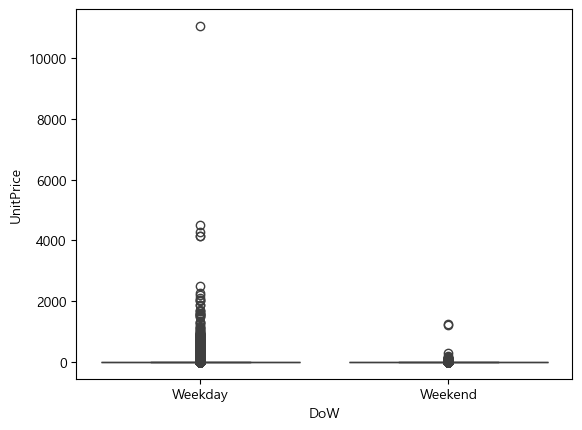

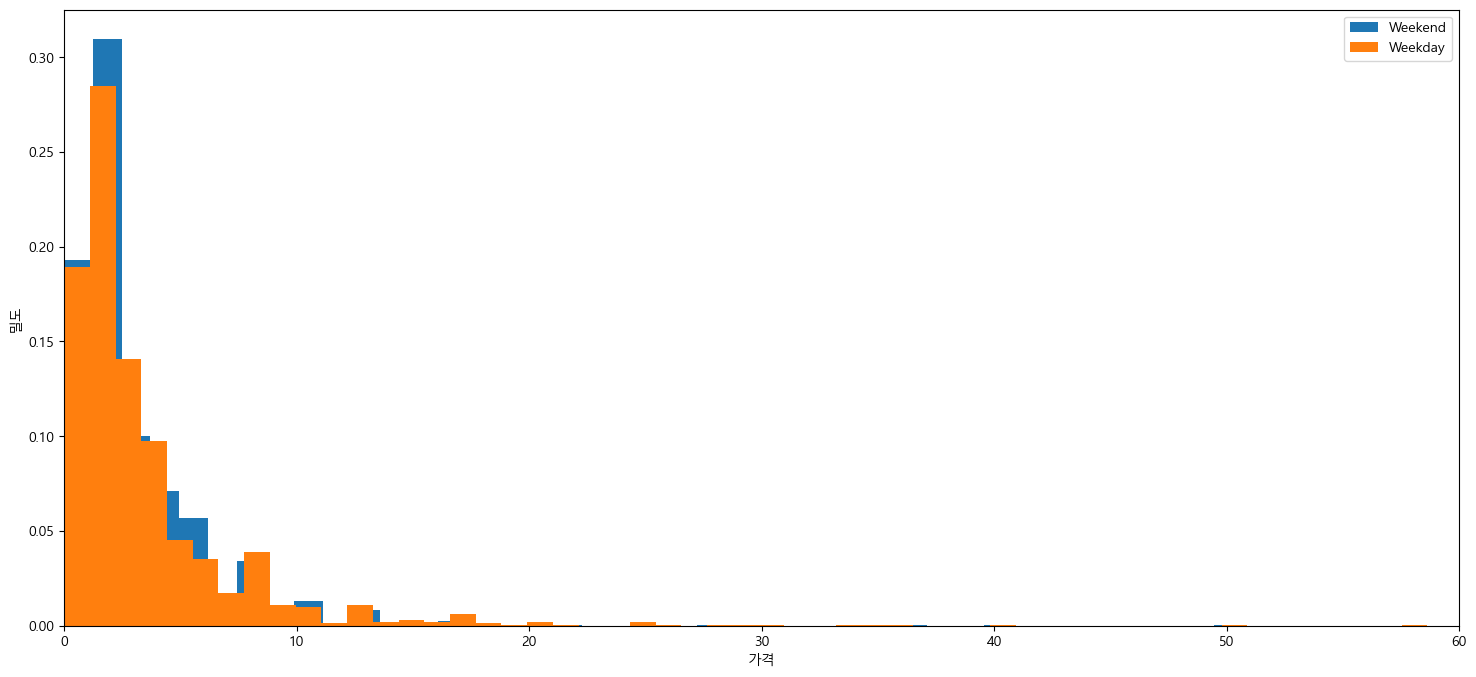


상위 1% 이상치 제거


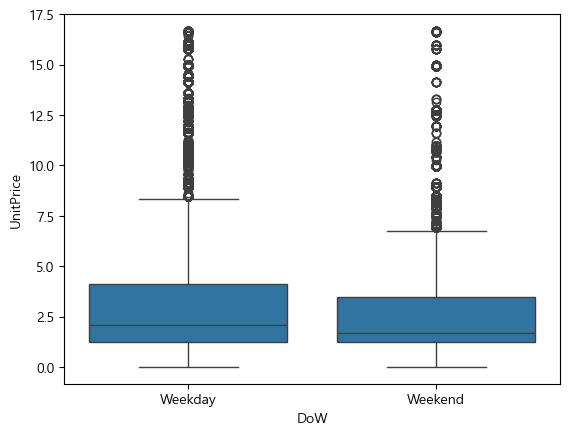

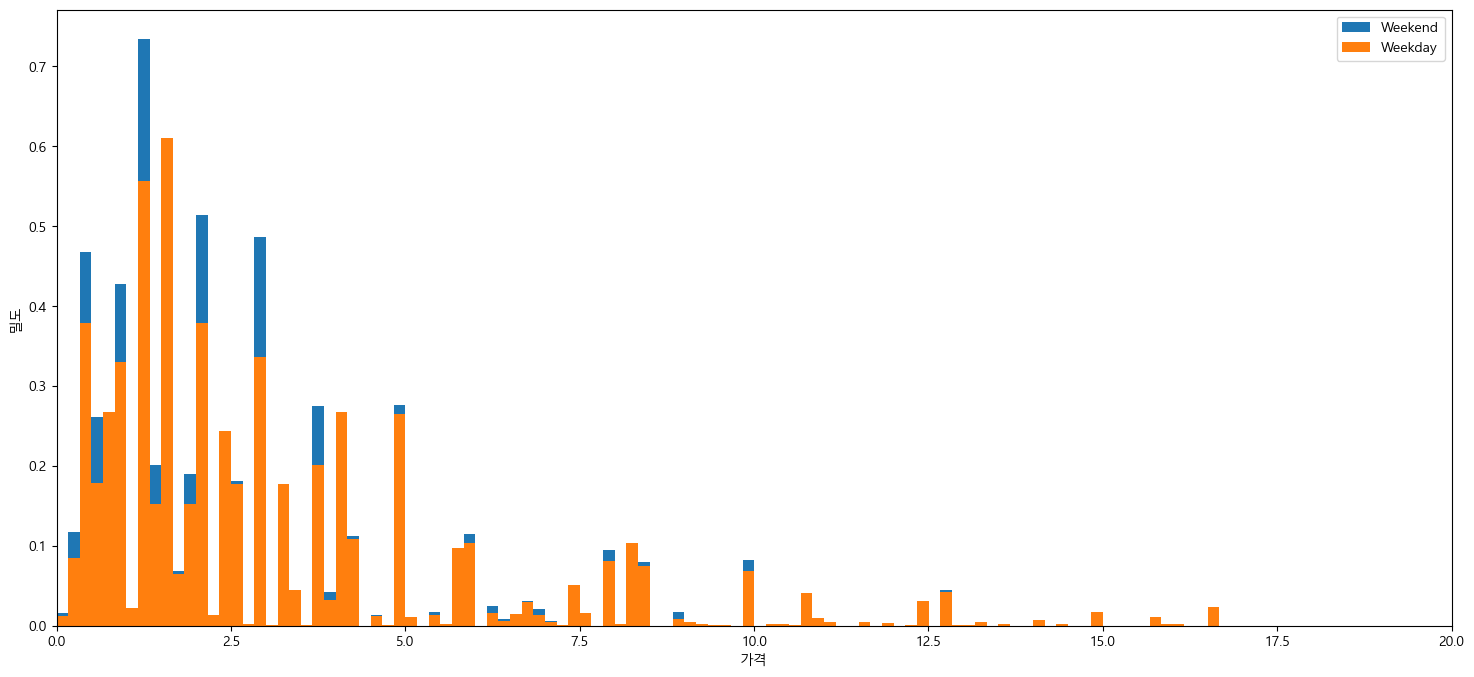

In [23]:
sns.boxplot(x='DoW', y='UnitPrice', data=df, order=['Weekday', 'Weekend'])
plt.show()

f, ax = plt.subplots(figsize=(18,8)) 
plt.hist(df[df['DoW'] == 'Weekend']['UnitPrice'], bins=1000, density=True, label='Weekend')
plt.hist(df[df['DoW'] == 'Weekday']['UnitPrice'], bins=10000, density=True, label='Weekday')
plt.legend(loc = 'best')
plt.xlabel('가격')
plt.ylabel('밀도')
plt.xlim([0, 60])
plt.show()

print("\n상위 1% 이상치 제거")

df_limit = df[df['UnitPrice'] < df['UnitPrice'].quantile(0.99)] #상위 이상치 제거

sns.boxplot(x='DoW', y='UnitPrice', data=df_limit, order=['Weekday', 'Weekend'])
plt.show()

f, ax = plt.subplots(figsize=(18,8)) 
plt.hist(df_limit[df_limit['DoW'] == 'Weekend']['UnitPrice'], bins=100, density=True, label='Weekend')
plt.hist(df_limit[df_limit['DoW'] == 'Weekday']['UnitPrice'], bins=100, density=True, label='Weekday')
plt.legend(loc = 'best')
plt.xlabel('가격')
plt.ylabel('밀도')
plt.xlim([0, 20])
plt.show()

In [24]:
UP_weekday = df[df['DoW'] == 'Weekday']['UnitPrice']
UP_weekend = df[df['DoW'] == 'Weekend']['UnitPrice']

u_statistic, p_value = stats.mannwhitneyu(UP_weekday, UP_weekend,alternative='two-sided') #맨-휘트니 U 검정

print(f"U-통계량: {u_statistic:.4f}")
print(f"P-값: {p_value:.4f}")

UP_weekday = df_limit[df_limit['DoW'] == 'Weekday']['UnitPrice']
UP_weekend = df_limit[df_limit['DoW'] == 'Weekend']['UnitPrice']

u_statistic, p_value = stats.mannwhitneyu(UP_weekday, UP_weekend,alternative='two-sided') #맨-휘트니 U 검정
print("\n상위 1% 이상치 제거 후 통계량")
print(f"U-통계량: {u_statistic:.4f}")
print(f"P-값: {p_value:.4f}")


U-통계량: 16096668027.0000
P-값: 0.0000

상위 1% 이상치 제거 후 통계량
U-통계량: 15714909891.5000
P-값: 0.0000


맨-휘트니 U 검정은 두 집단의 분포를 비교 분석하는 방법이다.
이상치의 영향을 고려해서 이상치 제거 유무에 따라서 맨-휘트니 U 검정을 시행했습니다.

둘다 p 값이 0에 근접하므로
귀무가설"주중 주말의 가격의 분포 차이는 없다"를 기각하고 대립가설 "주중 주말의 가격의 분포 차이는 있다"를 채택하였습니다.

결론:주중 주말의 가격의 분포 차이는 있다

## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [25]:
#데이터 전처리는 앞에서 했기 때문에 생략합니다
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression

df_for_train = df[['Quantity','UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']]

transformer = StandardScaler()
LR = LinearRegression()

dfe = pd.get_dummies(df_for_train['Country']) #원 핫 인코딩
dfe.reset_index(drop=True, inplace=True) #인덱스 초기화
dfr = transformer.fit_transform(df_for_train[['Quantity','UnitPrice', 'DayOfWeek', 'InvoiceMonth']]) #정규화 스케일링
dfr = pd.DataFrame(dfr, columns=['Quantity','UnitPrice', 'DayOfWeek', 'InvoiceMonth'])

X = pd.concat([dfr[['UnitPrice', 'DayOfWeek', 'InvoiceMonth']], dfe], axis= 1)
Y = dfr['Quantity']

LR.fit(X,Y) #모델 학습

r_square = LR.score(X, Y)
intercept = LR.intercept_
coefficients = LR.coef_

print(f"결정계수: {r_square:.4f}")

print(f"\n[회귀 계수]")
print(LR.coef_)


결정계수: 0.0323

[회귀 계수]
[-0.01927926 -0.0110988  -0.00285063  1.46207609 -0.22941485 -0.15596075
 -0.24629938 -0.2496105  -0.07620031 -0.21433392 -0.27728084  0.16362943
  0.02808358 -0.05841747 -0.3261635  -0.13559629 -0.19785409 -0.20016571
 -0.27233814 -0.10291397 -0.19925857 -0.1522087  -0.26589101  1.63395478
 -0.32606824 -0.0305925  -0.32851685  1.73093618 -0.06434296 -0.2578894
 -0.26390209 -0.38478403 -0.31909019  0.08991614 -0.26183767  1.60708203
 -0.13675854 -0.14433652 -0.17333201 -0.30811762 -0.3562016 ]


종속 변수와 독립 변수 간의 관계가 선형이 아니거나, 뚜렷한 관련이 없거나 데이터가 정규화 과정에서 이상치의 영향을 많이 받아서 결정계수가 낮고 회귀 계수도 불안정한 값을 가질 수 있다고 생각합니다.

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [26]:
df2 = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1') # 전처리전 새 데이터 원본
df2["TotalPrice"] = df2["Quantity"] * df2["UnitPrice"]
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])
df2['DayOfWeek'] = df2['InvoiceDate'].dt.dayofweek
df2["InvoiceDate"] = pd.to_datetime(df2["InvoiceDate"].astype(str))
df2["InvoiceMonth"] = df2["InvoiceDate"].dt.month

df2['IsReturn'] = df2['InvoiceNo'].str.startswith('C', na=False).astype(int) #주문 반품 확인 피쳐 생성
df2 = df2[df2['UnitPrice'] > 0] #가격이 음수나 0인 이상치 제거



C:\Users\Coco\AppData\Local\Temp\ipykernel_78860\1441193299.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

transformer = StandardScaler()

df2['Quantity'] = df2['Quantity'].abs() #수량을 전부 양수로 바꿈

dfe2 = pd.get_dummies(df2['Country']) #원 핫 인코딩
dfr2 = transformer.fit_transform(df2[['Quantity','UnitPrice', 'DayOfWeek', 'InvoiceMonth']]) #정규화 스케일링
dfr2 = pd.DataFrame(df2, columns=['Quantity','UnitPrice', 'DayOfWeek', 'InvoiceMonth'])

X = pd.concat([dfr2, dfe2], axis= 1)
Y = df2['IsReturn']

#학습 데이터와 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

lr_model = LogisticRegression(random_state=42, max_iter=3000)
lr_model.fit(X_train, Y_train)
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

acc = accuracy_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)
auc = roc_auc_score(Y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)

print(f'정확도: {acc:.4f}')



정확도: 0.9828


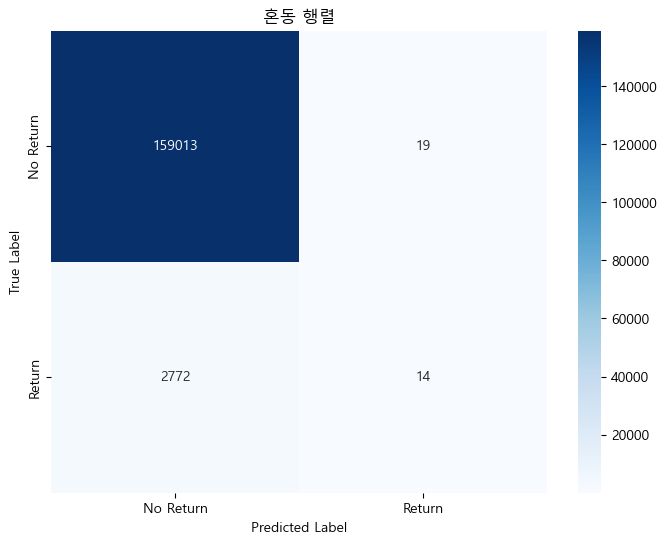

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Return', 'Return'], yticklabels=['No Return', 'Return'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('혼동 행렬')
plt.show()

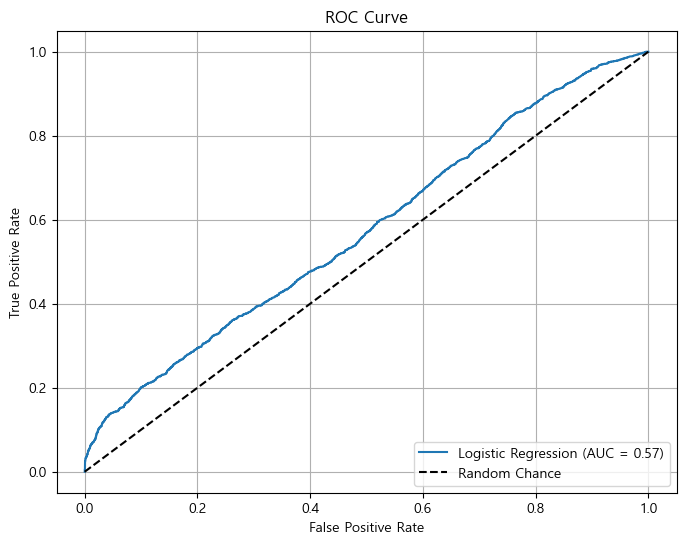

In [29]:
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(Y_test, y_pred, pos_label=1)
recall = recall_score(Y_test, y_pred, pos_label=1)
f1 = f1_score(Y_test, y_pred, pos_label=1)

print(f"\n정밀도: {precision:.4f}")
print(f"재현율: {recall:.4f}")
print(f"F1-점수: {f1:.4f}")


정밀도: 0.4242
재현율: 0.0050
F1-점수: 0.0099


모델 성능이 낮게 나온 이유
1) 로지스틱 회귀 분석 모델이 맞는 모델이 아님
2) 실제 반품 여부와 feature들 간에 관계가 없음
3) parameter 튜닝이 잘못됨
4) 데이터의 불균형(반품 데이터가 부족함)
